In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'f2a7274d-b10d-4d67-9965-9ec657ecb5d9',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [2]:
type(data)


dict

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [5]:
df = pd.json_normalize(data['data'])


In [6]:
df.sample(5)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
1814,19893,Revolt 2 Earn,RVLT,revolt-2-earn,24,2022-05-02T09:13:25.000Z,[],NaN,5.981577e+13,65424725966677,False,NaN,1815,6.543257e+13,7.905339e+05,NaN,2024-03-27T12:01:00.000Z,1.208166e-08,64.022192,-98.2262,-0.329182,-2.375837,-3.397809,18.413549,25.438134,-14.807422,7.226738e+05,0.0000,790439.21,NaN,2024-03-27T12:01:00.000Z,3890.0,Polygon,MATIC,polygon,0x5d301750cc9719f00872E33Ee81f9C37aBa242F4
983,2916,Nimiq,NIM,nimiq,13,2018-07-10T00:00:00.000Z,[mineable],2.100000e+10,1.044803e+10,10967776767.805651,False,NaN,984,1.182746e+10,1.851145e+07,NaN,2024-03-27T12:01:00.000Z,1.565124e-03,368552.381818,27.0858,-0.082841,-8.628726,2.266833,3.894661,-0.314412,16.922048,1.635246e+07,0.0006,32867606.83,NaN,2024-03-27T12:01:00.000Z,NaN,NaN,NaN,NaN,NaN
3992,7757,BeFaster Holder Token,BFHT,befasterholdertoken,8,2020-11-23T00:00:00.000Z,[],3.000000e+08,0.000000e+00,0,False,NaN,3993,2.977026e+08,1.857828e+06,NaN,2024-03-27T12:01:00.000Z,6.240551e-03,69937.196527,4.7125,-0.665859,5.251222,52.870333,37.532117,304.665904,358.224344,0.000000e+00,0.0000,1872165.26,NaN,2024-03-27T12:01:00.000Z,1839.0,BNB Smart Chain (BEP20),BNB,bnb,0x577ad06f635b402fc2724efd6a53a3a0aed3d155
688,8206,QuickSwap [Old],QUICK,quickswap,350,2021-01-07T00:00:00.000Z,"[decentralized-exchange-dex-token, defi, yield...",1.000000e+06,5.139970e+05,1000000,False,NaN,689,3.250000e+05,3.003974e+07,0.341952,2024-03-27T12:02:00.000Z,9.242997e+01,63696.595549,-23.6922,0.484571,-3.698891,14.436059,52.933005,83.632255,40.984453,4.750872e+07,0.0018,92429965.26,1.389338e+08,2024-03-27T12:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0x6c28aef8977c9b773996d0e8376d2ee379446f2f
3350,21946,Cramer Coin,CRAMER,cramer-coin,15,2022-09-26T11:17:47.000Z,[memes],1.000000e+09,0.000000e+00,1000000000,False,NaN,3351,NaN,NaN,NaN,2024-03-27T12:01:00.000Z,1.716397e-03,231667.610522,146.4296,0.018477,-8.349799,-33.657065,54.492588,146.867509,52.558016,0.000000e+00,0.0000,1716397.22,NaN,2024-03-27T12:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0x64df3aab3b21cc275bb76c4a581cf8b726478ee0


Checking info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  5000 non-null   int64  
 1   name                                5000 non-null   object 
 2   symbol                              5000 non-null   object 
 3   slug                                5000 non-null   object 
 4   num_market_pairs                    5000 non-null   int64  
 5   date_added                          5000 non-null   object 
 6   tags                                5000 non-null   object 
 7   max_supply                          3551 non-null   float64
 8   circulating_supply                  5000 non-null   float64
 9   total_supply                        5000 non-null   object 
 10  infinite_supply                     5000 non-null   bool   
 11  platform                            0 non-n

In [8]:
df.describe()

,id,num_market_pairs,max_supply,circulating_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,platform.id
count,5000.000000,5000.000000,3.551000e+03,5.000000e+03,0.0,5000.00000,3.249000e+03,3.249000e+03,7.800000e+01,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03,8.300000e+01,4301.000000
mean,16653.542200,66.997800,2.820356e+18,4.362289e+14,NaN,2500.50020,3.563930e+55,3.568956e+55,1.910058e+04,1.386676e+03,4.211945e+07,211.385103,0.297732,2.317587e+03,1.187846e+06,1.594908e+06,1.984085e+06,1.435573e+06,5.533169e+08,0.020038,4.579371e+11,9.073339e+08,2857.180191
std,9441.163715,1229.449737,1.678126e+20,1.553432e+16,NaN,1443.52035,2.031440e+57,2.034305e+57,1.675032e+05,7.400314e+04,1.203196e+09,6797.007604,6.220754,1.638192e+05,8.383977e+07,1.094511e+08,1.372949e+08,9.910807e+07,2.063046e+10,0.779110,2.210301e+13,4.151447e+09,4256.071389
min,1.000000,1.000000,0.000000e+00,0.000000e+00,NaN,1.00000,1.000000e+00,3.272214e-07,2.445750e-03,4.300154e-17,0.000000e+00,-100.000000,-93.808327,-9.943567e+01,-9.999927e+01,-1.000000e+02,-1.000000e+02,-1.000000e+02,0.000000e+00,0.000000,0.000000e+00,9.752580e+00,1.000000
25%,8340.750000,5.000000,1.000000e+08,0.000000e+00,NaN,1250.75000,2.538512e+07,7.468430e+05,2.260352e-01,1.497478e-03,3.563017e+04,-20.595900,-0.292028,-6.571927e+00,-3.578696e+00,-8.589463e+00,-8.236519e+00,-2.276759e+01,0.000000e+00,0.000000,1.101832e+06,6.092038e+05,1027.000000
50%,16494.000000,10.000000,1.000000e+09,0.000000e+00,NaN,2500.50000,1.686008e+08,4.220815e+06,1.206200e+00,2.309588e-02,1.512654e+05,-0.726550,0.047690,-2.107248e+00,5.593885e+00,1.404382e+01,2.479443e+01,1.007538e+01,0.000000e+00,0.000000,9.039727e+06,1.048514e+07,1027.000000
75%,25545.000000,25.000000,5.000000e+09,1.499978e+08,NaN,3750.25000,1.392360e+09,2.486279e+07,5.372153e+00,3.406126e-01,1.094834e+06,20.550000,0.629495,4.543441e-01,1.645966e+01,4.881500e+01,7.657522e+01,6.234502e+01,6.431486e+06,0.000000,7.500401e+07,9.779686e+07,1839.000000
max,30147.000000,80359.000000,1.000000e+22,9.818468e+17,NaN,5001.00000,1.157921e+59,1.159554e+59,1.479466e+06,5.205952e+06,7.511187e+10,440506.712900,286.879794,1.158377e+07,5.928360e+09,7.736049e+09,9.706183e+09,7.006358e+09,1.382340e+12,52.220900,1.199550e+15,3.518394e+10,28857.000000


In [9]:
df.isnull().sum()

id                                       0
name                                     0
symbol                                   0
slug                                     0
num_market_pairs                         0
date_added                               0
tags                                     0
max_supply                            1449
circulating_supply                       0
total_supply                             0
infinite_supply                          0
platform                              5000
cmc_rank                                 0
self_reported_circulating_supply      1751
self_reported_market_cap              1751
tvl_ratio                             4922
last_updated                             0
quote.USD.price                          0
quote.USD.volume_24h                     0
quote.USD.volume_change_24h              0
quote.USD.percent_change_1h              0
quote.USD.percent_change_24h             0
quote.USD.percent_change_7d              0
quote.USD.p

In [10]:
df.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address'],
      dtype='object')

## Market Analysis:

>The distribution of cmc_rank to understand the market positioning of various  cryptocurrencies.

c:\Users\chara\miniconda\envs\tensor\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


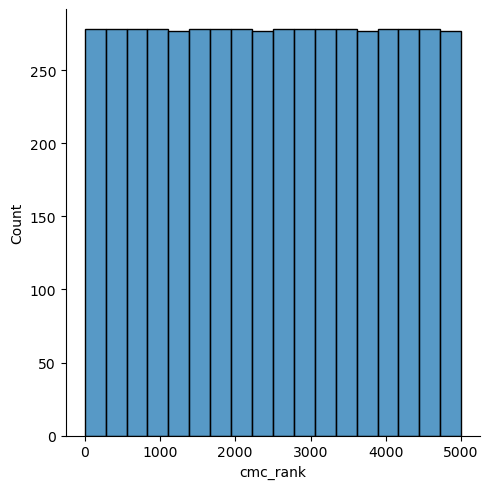

In [11]:
sns.displot(df['cmc_rank'])

c:\Users\chara\miniconda\envs\tensor\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chara\miniconda\envs\tensor\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='circulating_supply', ylabel='total_supply'>

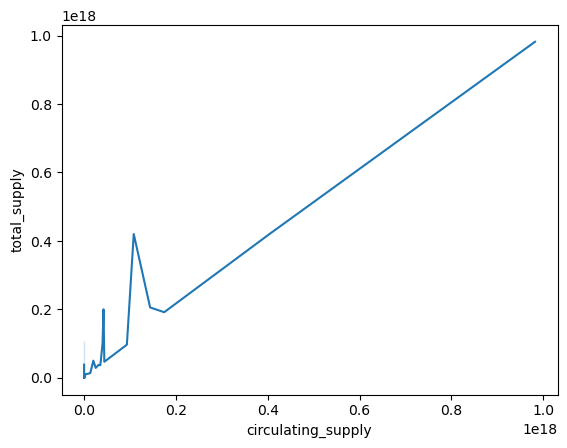

In [12]:
sns.lineplot(data=df, x='circulating_supply', y='total_supply')

c:\Users\chara\miniconda\envs\tensor\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chara\miniconda\envs\tensor\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='circulating_supply', ylabel='max_supply'>

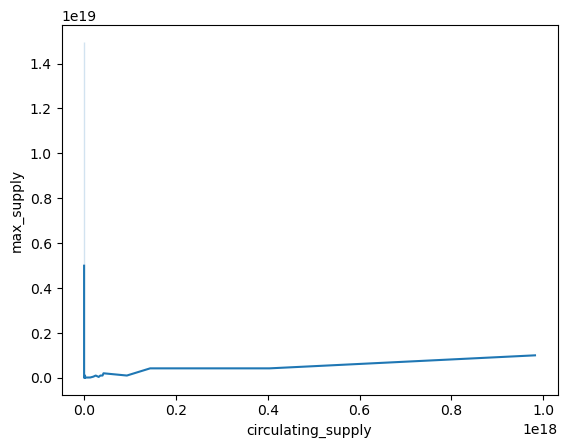

In [13]:
sns.lineplot(data=df, x='circulating_supply', y='max_supply')